In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rfpimp import *


In [30]:
#data= pd.read_csv("C:/Users/Desmond Gukwe/Google Drive/Python Scripts/winequality/winequality/Churn.csv"  )

data= pd.read_csv("C:/Users/Desmond Gukwe/Google Drive/Python Scripts/winequality/winequality/Churn_raw.csv"  )

data.head()

,id,year,month_of_year,account_id,balance,days_since_last_deposit,time_in_our_system,variable_saas_ratio,payout_gt_10000_lm,yield_rate,...,has_gt_2_conversion_ats,saas_churned_next_three_months,yellow_flag,red_flag,retrospectively_churned_next_three_months,retrospective_SAAS_current_month,retrospective_SAAS_next_month,retrospective_SAAS_2_after,retrospective_SAAS_3_after,doe
0,30961,2016,1,10047,2381.51,6,2326,0.0000,1,0.0633,...,1,0,0,0,0,0.0,0.0,0.0,0.0,2017/08/22 03:00
1,30962,2016,1,10063,0.00,0,2299,0.0000,0,3.9151,...,0,0,0,0,0,0.0,0.0,0.0,0.0,2017/08/22 03:00
2,30963,2016,1,10211,8548.06,7,2181,0.0000,0,0.1067,...,1,0,0,0,0,0.0,0.0,0.0,0.0,2017/08/22 03:00
3,30964,2016,1,10424,1787.96,48,2073,0.0000,1,0.0336,...,1,0,0,0,0,0.0,0.0,0.0,0.0,2017/08/22 03:00
4,30965,2016,1,10475,100000.00,28,2051,0.8333,1,0.0460,...,0,0,0,0,0,0.0,0.0,0.0,0.0,2017/08/22 03:00


In [31]:
data=data.drop(['id','year','account_id','yellow_flag', 'red_flag', 'retrospectively_churned_next_three_months', 'retrospective_SAAS_next_month', 'retrospective_SAAS_2_after', 'retrospective_SAAS_3_after', 'retrospective_SAAS_current_month','doe'],axis =1)
feat_labels =data.columns

feat_labels

Index(['month_of_year', 'balance', 'days_since_last_deposit',
       'time_in_our_system', 'variable_saas_ratio', 'payout_gt_10000_lm',
       'yield_rate', 'saas_increased_LM', 'saas_decreased_LM',
       'variable_increased', 'variable_decreased',
       'negative_balance_under_three_saas_payments', 'has_a_custom_report',
       'has_5plus_custom_reports', 'has_a_scheduled_report',
       'has_3plus_scheduled_reports', 'has_4plus_users', 'has_a_csm',
       'has_a_login_LM', 'has_11plus_logins_LM', 'has_a_gt_one_user_login_LM',
       'has_gt_5_report_runs_LM', 'has_gt_200_report_runs_LM',
       'has_gt_100_active_mps_LM', 'has_gt_30000_clicks_LM',
       'has_gt_300_actions_LM', 'active_mps_decrease_3_months',
       'clicks_decrease_3_months', 'actions_decrease_3_months',
       'has_analytic_at', 'has_call_at', 'has_click_at', 'has_mobile_at',
       'has_gt_2_conversion_ats', 'saas_churned_next_three_months'],
      dtype='object')

In [32]:

data.head()
#data.isnull().any()

,month_of_year,balance,days_since_last_deposit,time_in_our_system,variable_saas_ratio,payout_gt_10000_lm,yield_rate,saas_increased_LM,saas_decreased_LM,variable_increased,...,has_gt_300_actions_LM,active_mps_decrease_3_months,clicks_decrease_3_months,actions_decrease_3_months,has_analytic_at,has_call_at,has_click_at,has_mobile_at,has_gt_2_conversion_ats,saas_churned_next_three_months
0,1,2381.51,6,2326,0.0000,1,0.0633,0,1,0,...,1,0,0,0,1,1,0,1,1,0
1,1,0.00,0,2299,0.0000,0,3.9151,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,8548.06,7,2181,0.0000,0,0.1067,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,1,1787.96,48,2073,0.0000,1,0.0336,0,0,0,...,0,0,1,0,1,0,0,1,1,0
4,1,100000.00,28,2051,0.8333,1,0.0460,0,0,1,...,1,0,0,0,0,0,0,1,0,0


In [33]:
# make general plots to examine each feature
def plot_var(col_name, full_name, continuous):
    """
    Visualize a variable with/without faceting on the Churn status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True for continuous variables
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,3))
    # plot1: counts distribution of the variable
    
    if continuous:  
        sns.distplot(data.loc[data[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(data[col_name], order=sorted(data[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

          
    # plot2: bar plot of the variable grouped by churned or not
    if continuous:
        sns.boxplot(x=col_name, y='saas_churned_next_three_months', data=data, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Churn status')
    else:
        Charged_Off_rates = data.groupby(col_name)['ch'].value_counts(normalize=True)[:,1]
        sns.barplot(x=Charged_Off_rates.index, y=Charged_Off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction churned')
        ax2.set_title('churned Rate by Churn status ' + full_name)
        ax2.set_xlabel(full_name)
    
    # plot3: kde plot of the variable gropued by loan_status
    if continuous:  
        facet = sns.FacetGrid(data, hue = 'saas_churned_next_three_months', size=3, aspect=4)
        facet.map(sns.kdeplot, col_name, shade=True)
        #facet.set(xlim=(df[col_name].min(), df[col_name].max()))
        facet.add_legend()  
    else:
        fig = plt.figure(figsize=(12,3))
        sns.countplot(x=col_name, hue='saas_churned_next_three_months', data=data, order=sorted(data[col_name].unique()) )
     
    plt.tight_layout()

C:\Users\Desmond Gukwe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Desmond Gukwe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Desmond Gukwe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Desmond Gukwe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Desmond Gukwe\Anaconda3\lib

C:\Users\Desmond Gukwe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Desmond Gukwe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Desmond Gukwe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Desmond Gukwe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


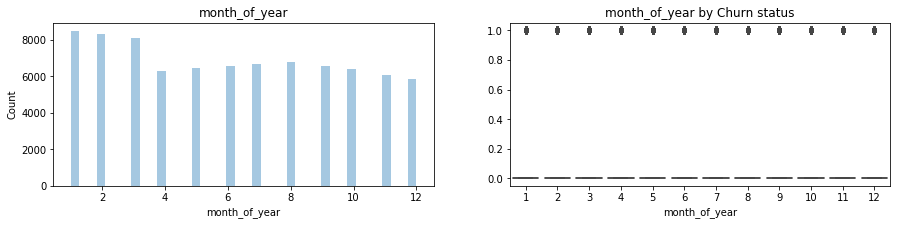

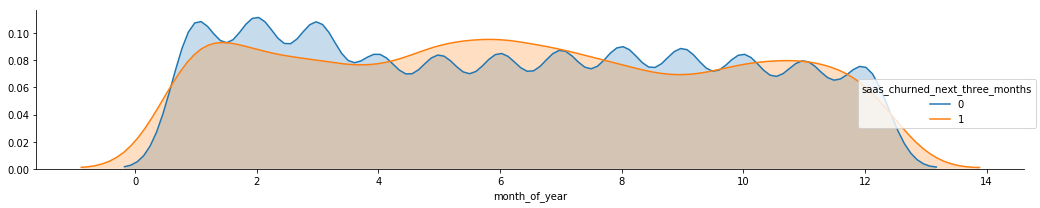

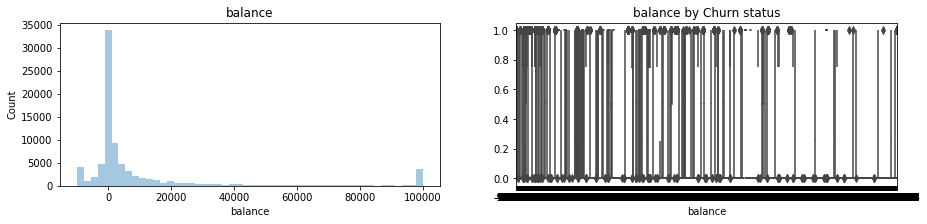

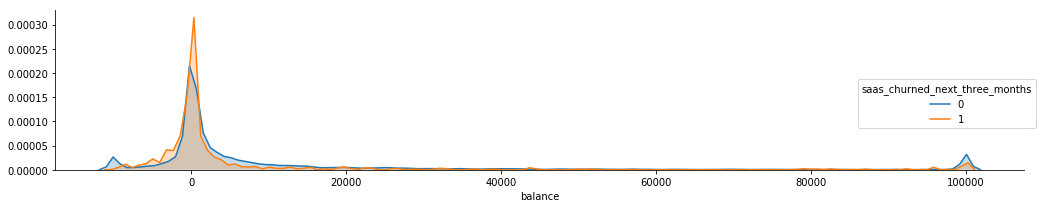

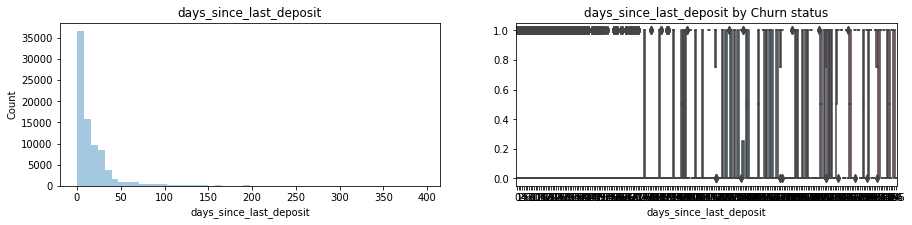

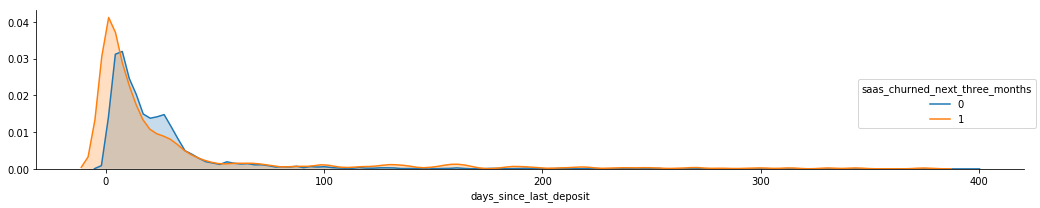

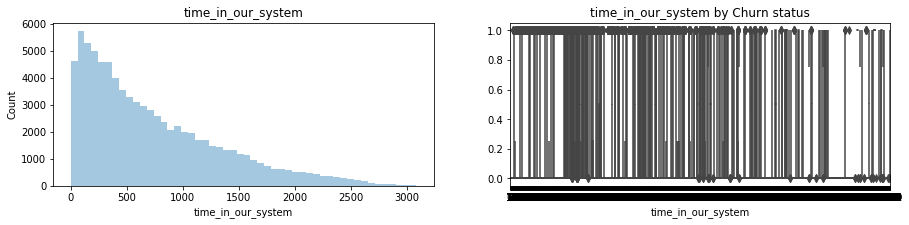

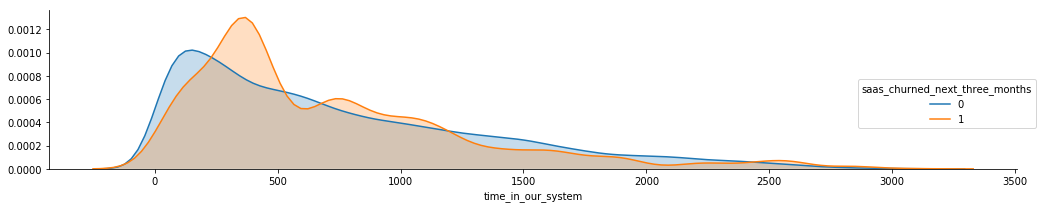

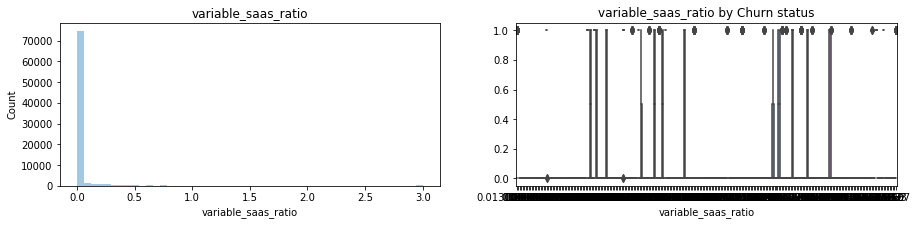

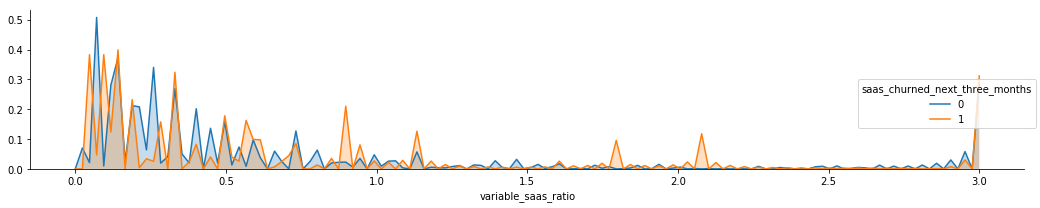

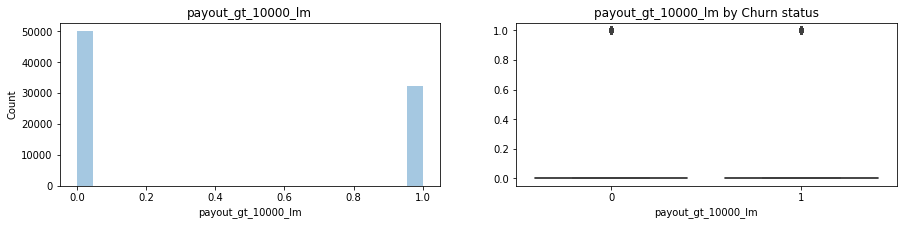

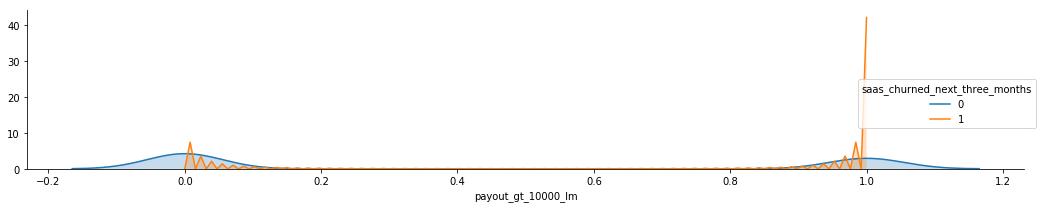

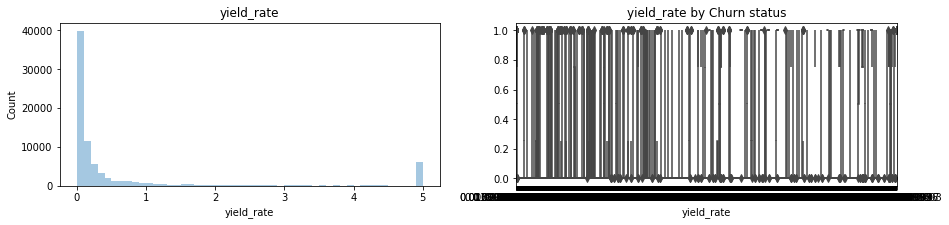

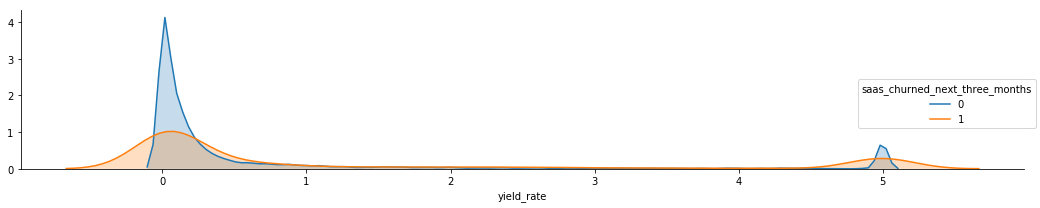

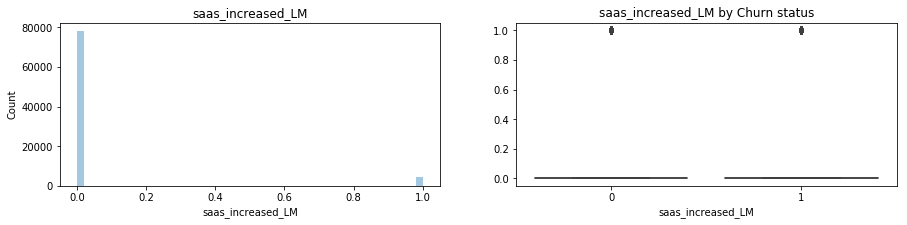

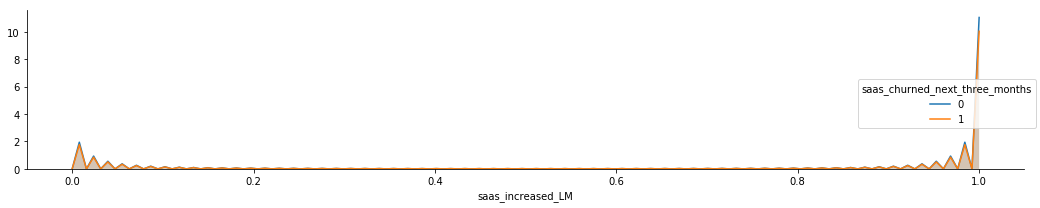

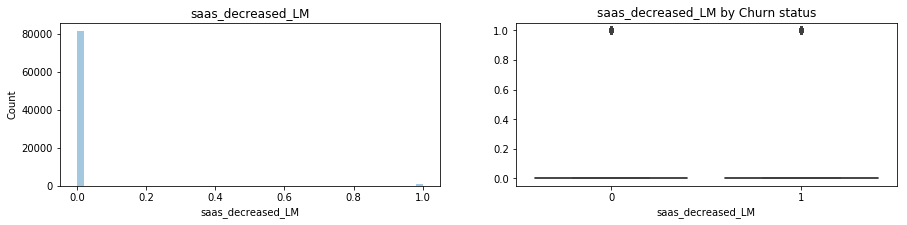

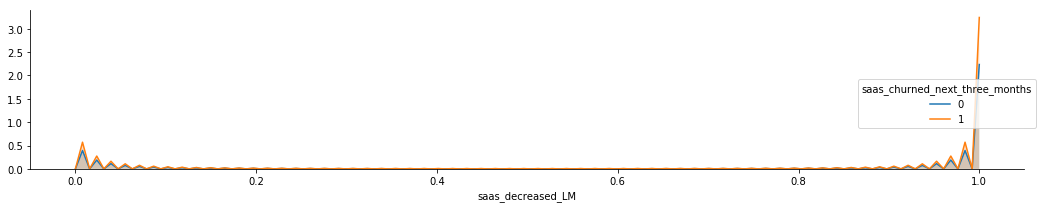

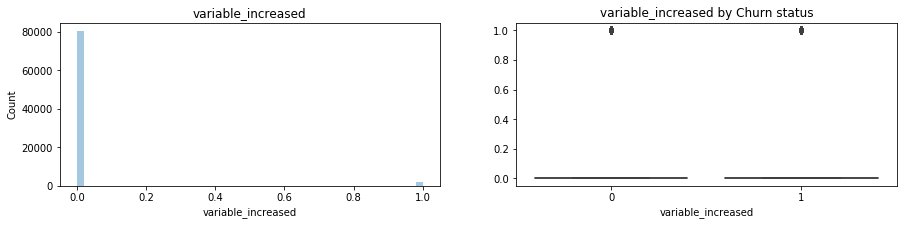

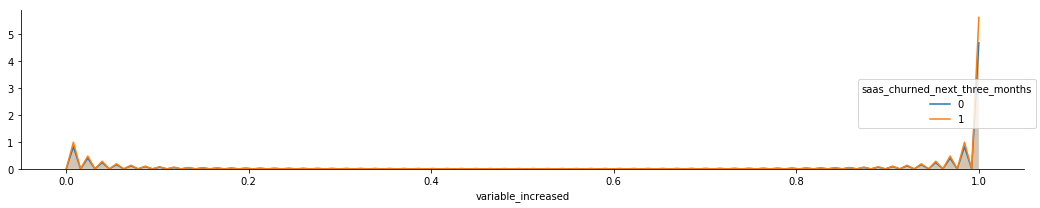

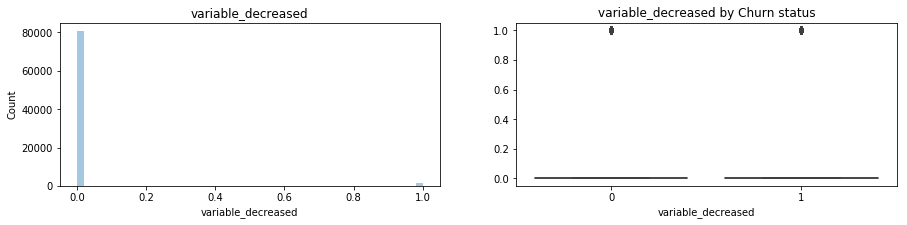

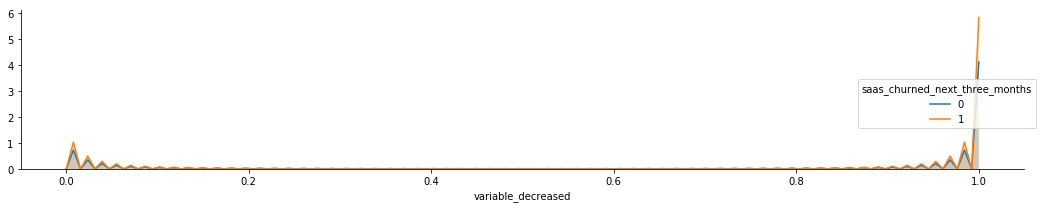

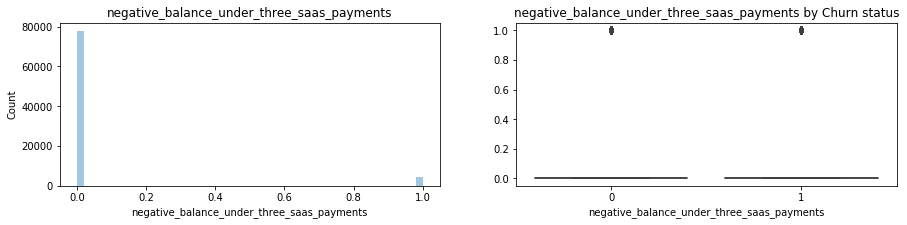

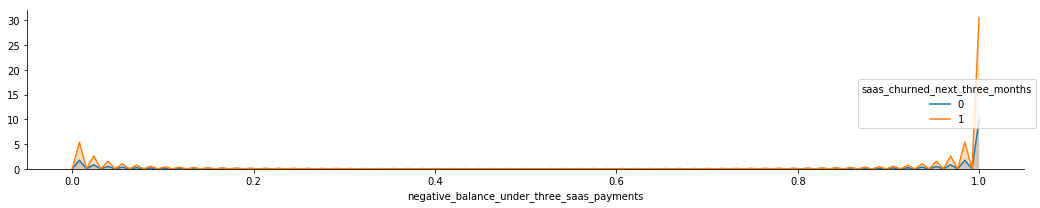

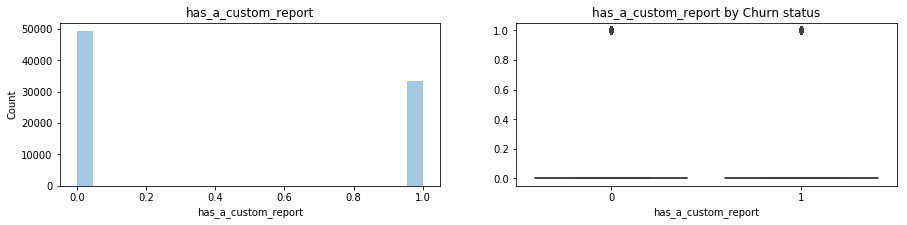

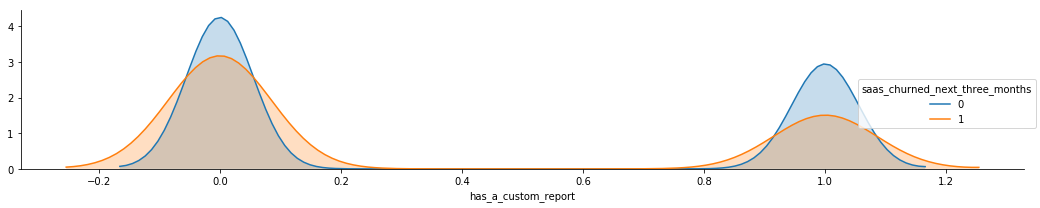

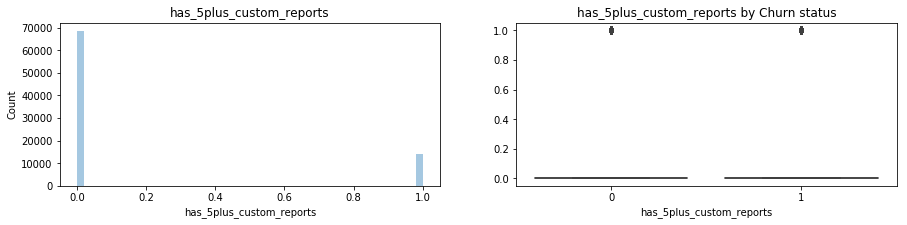

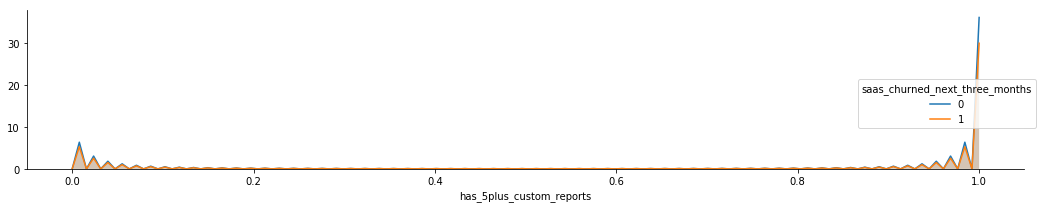

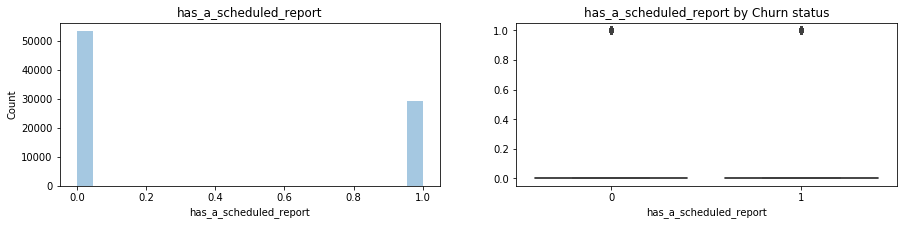

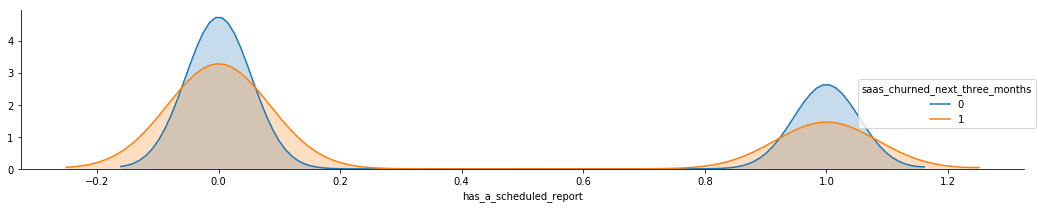

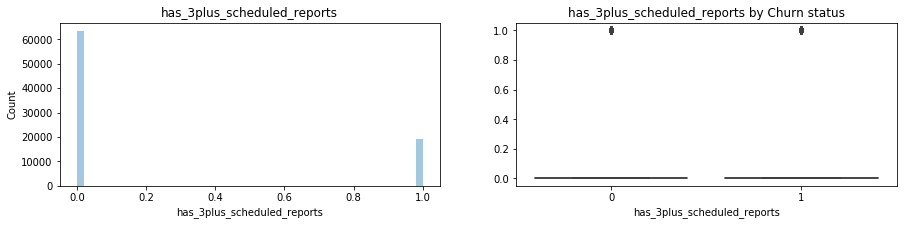

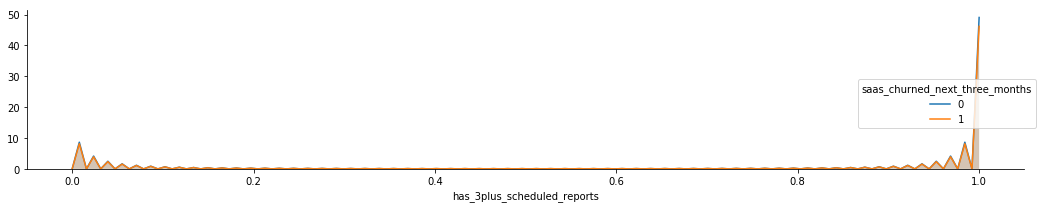

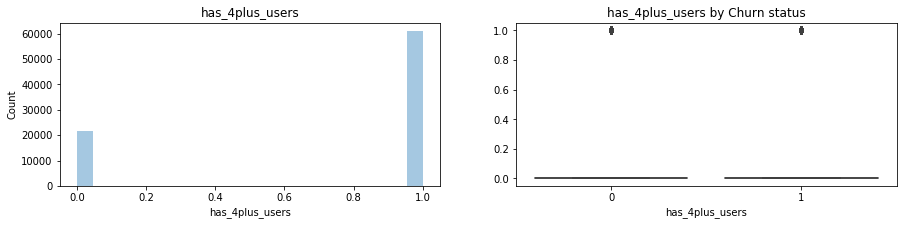

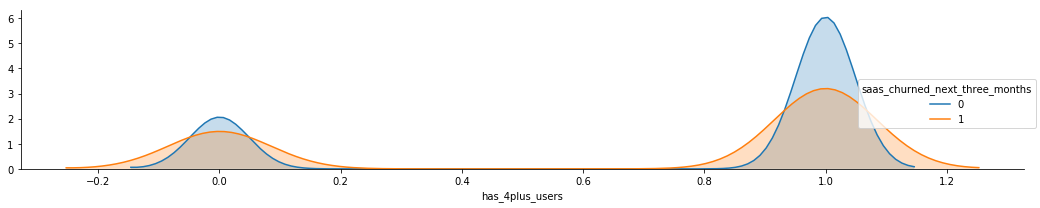

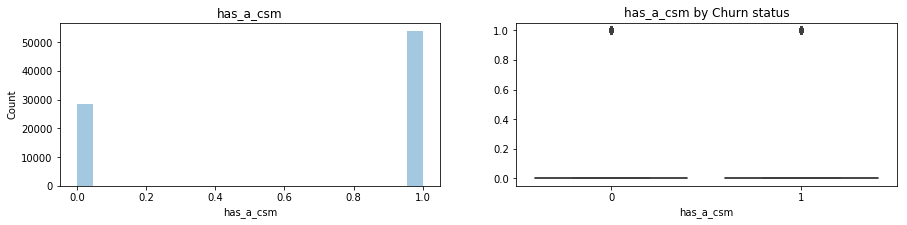

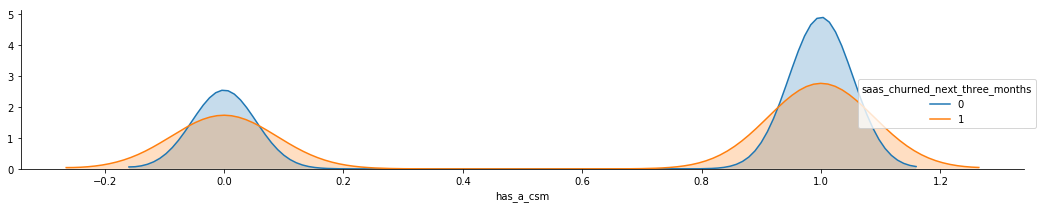

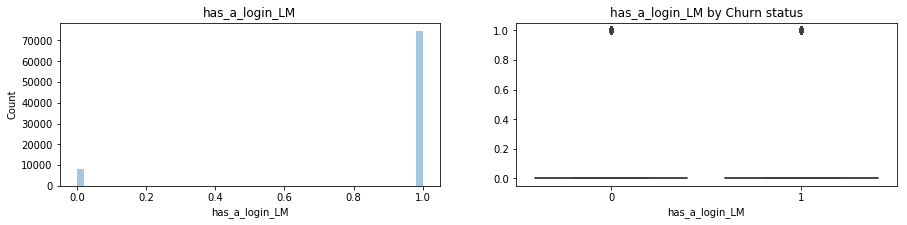

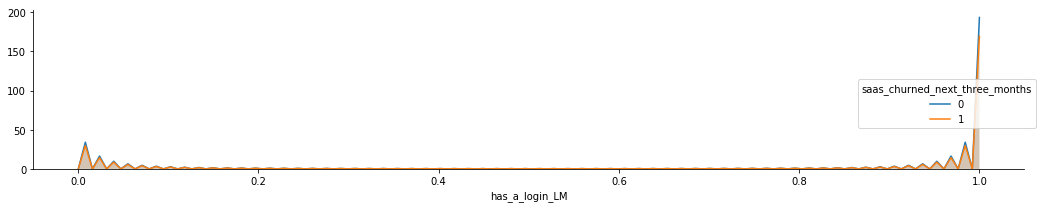

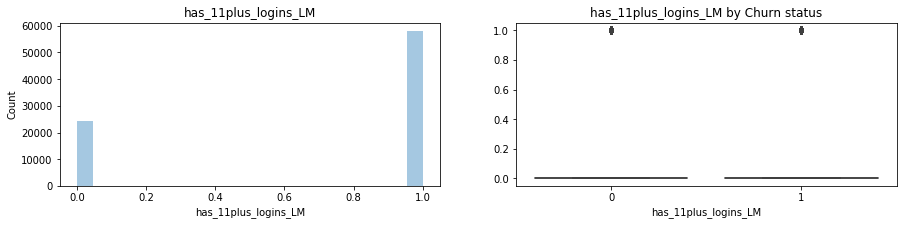

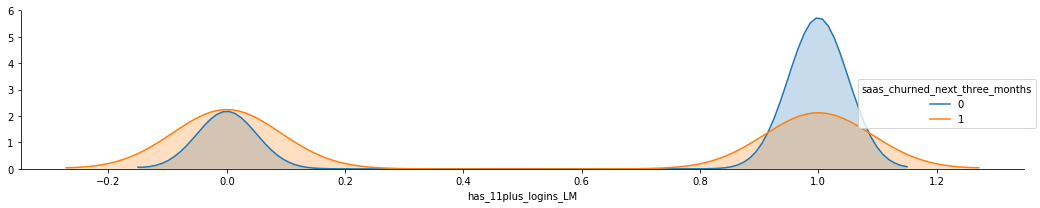

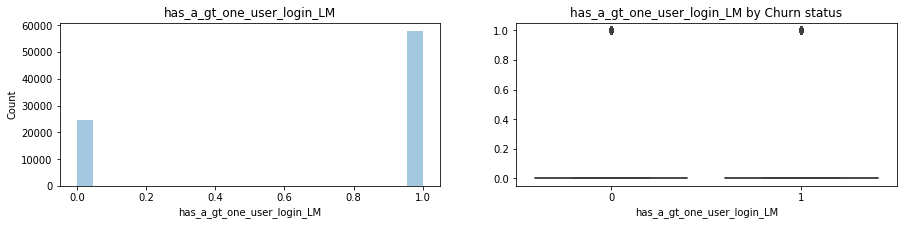

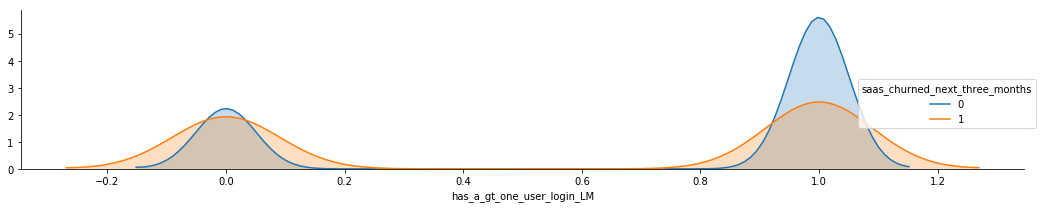

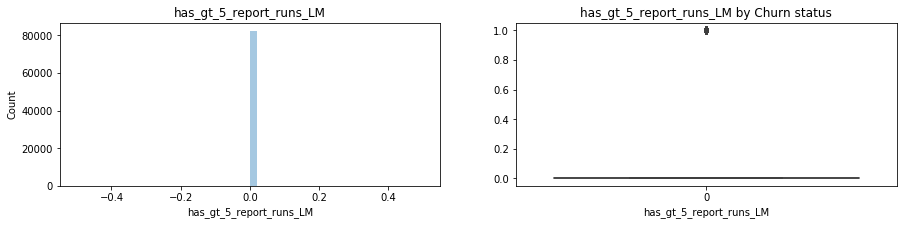

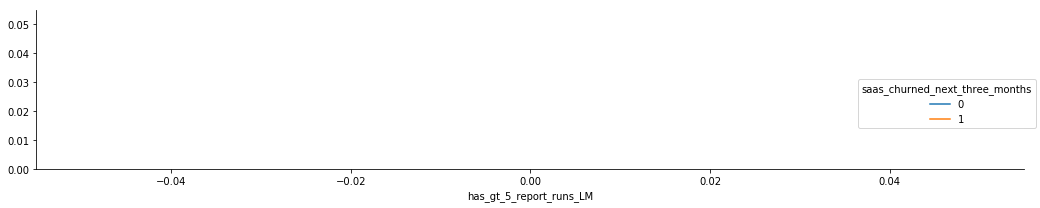

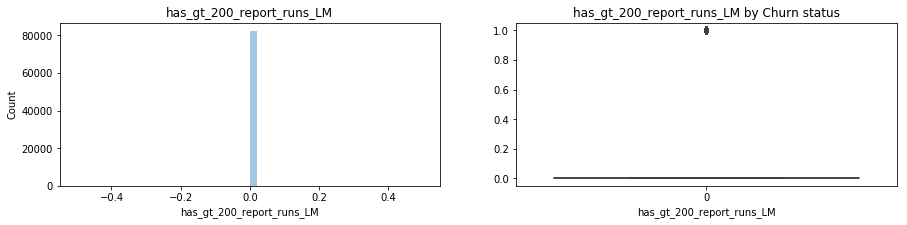

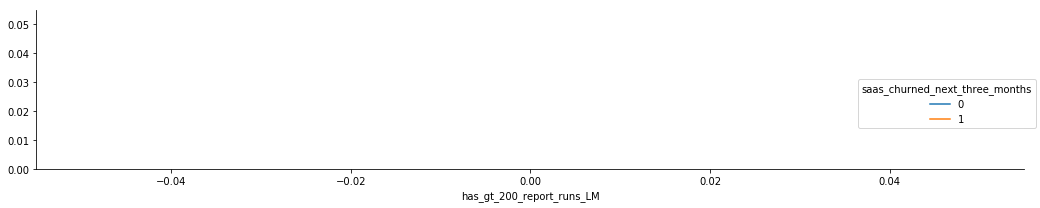

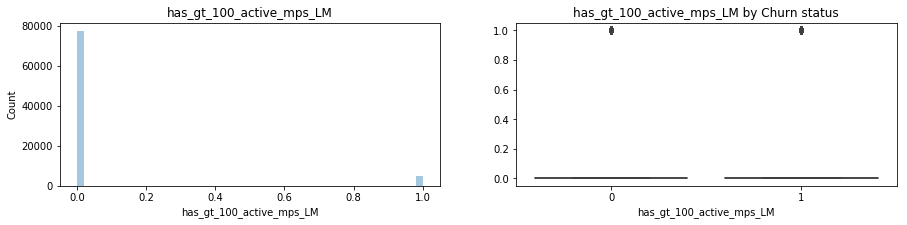

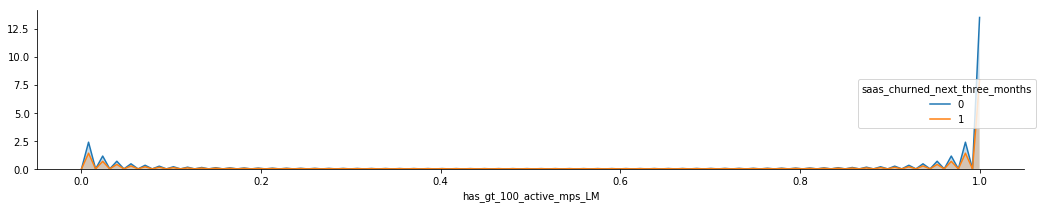

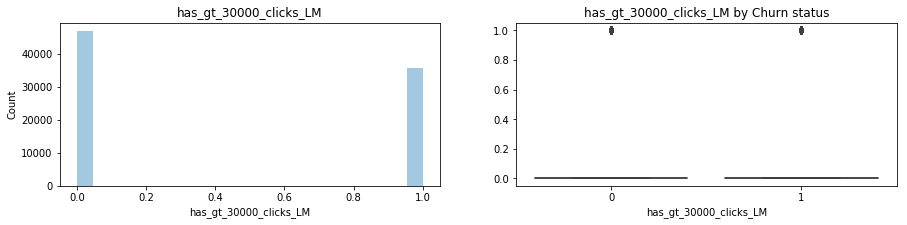

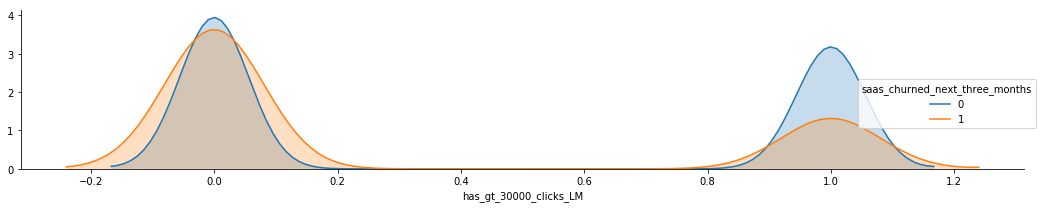

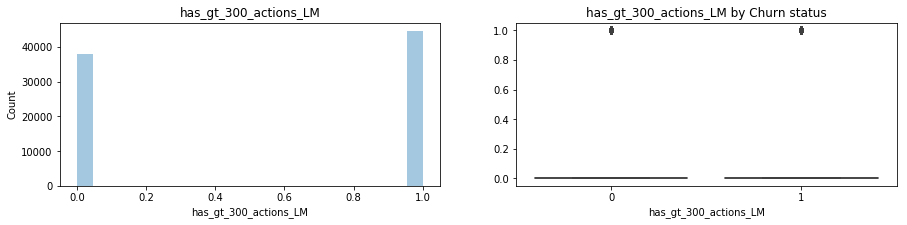

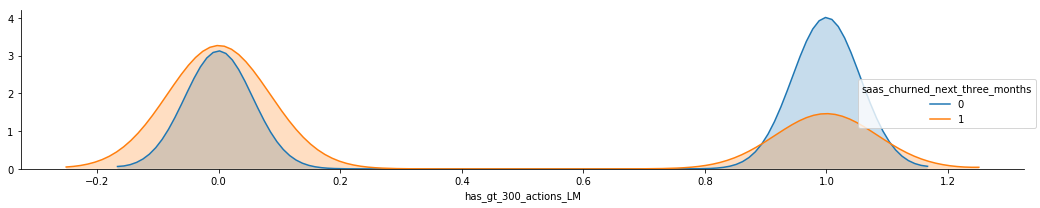

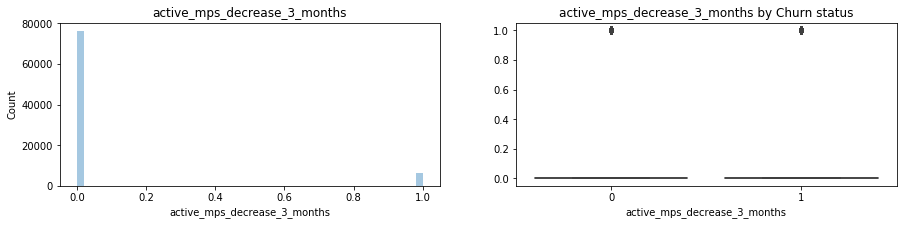

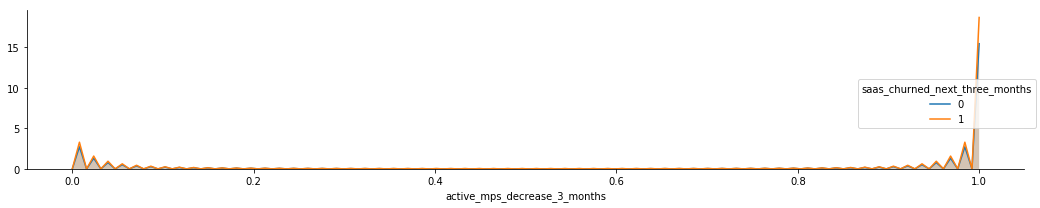

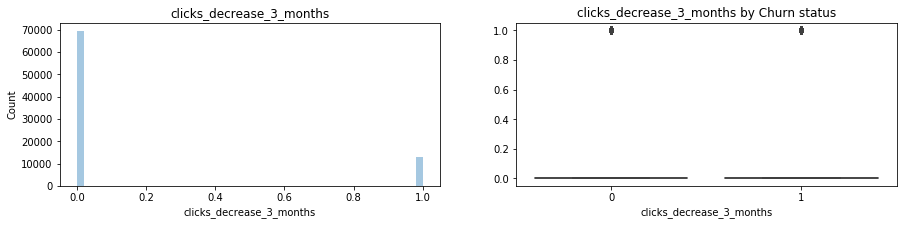

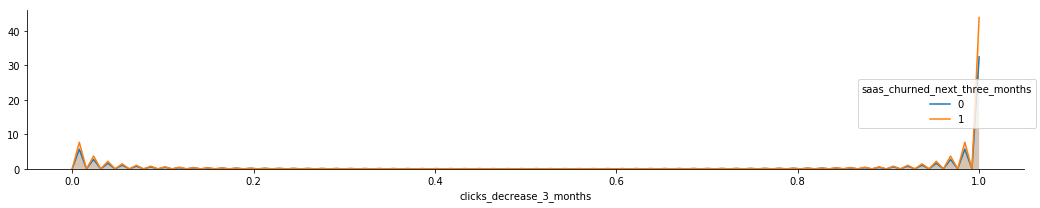

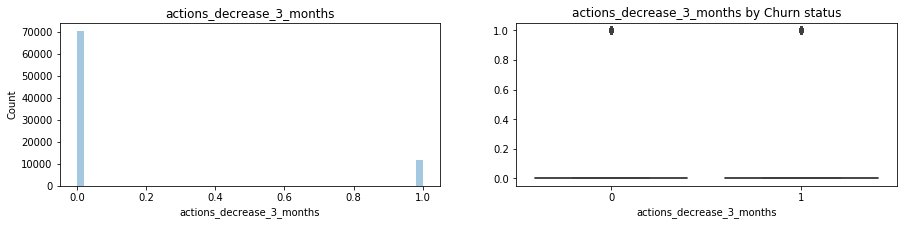

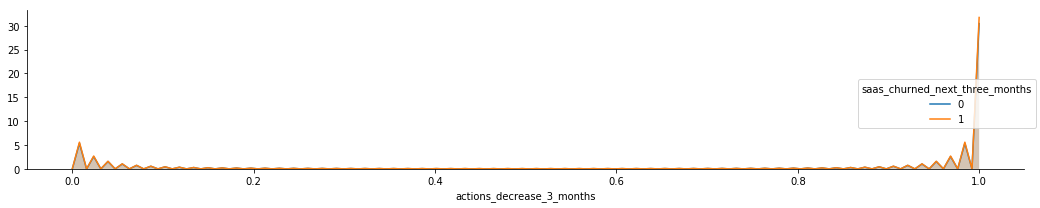

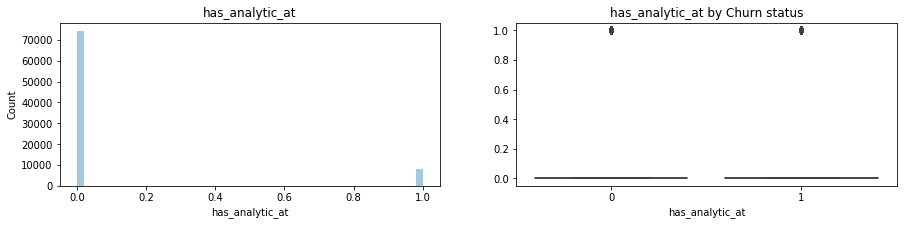

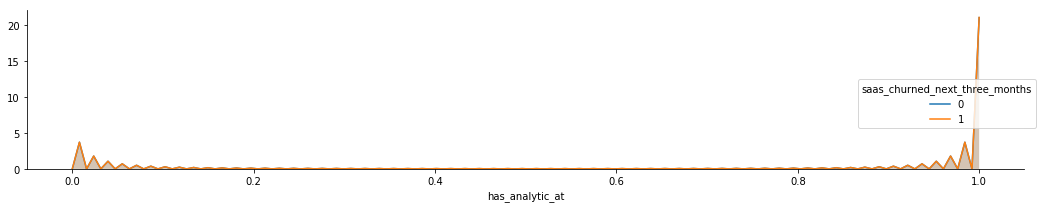

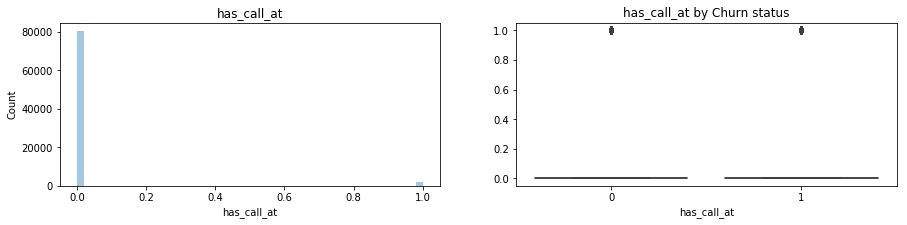

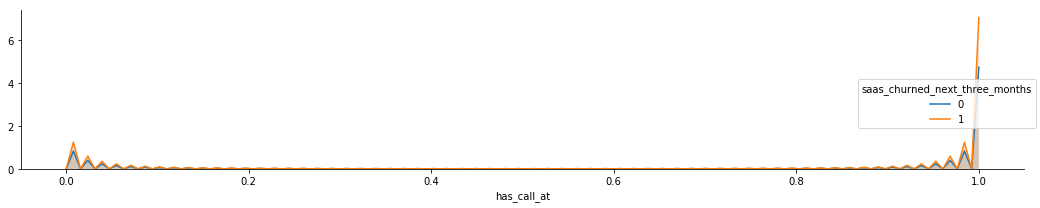

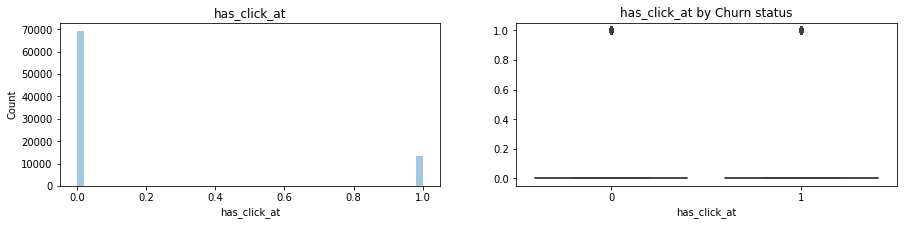

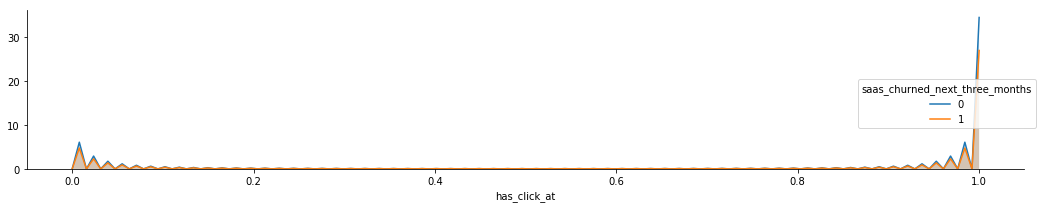

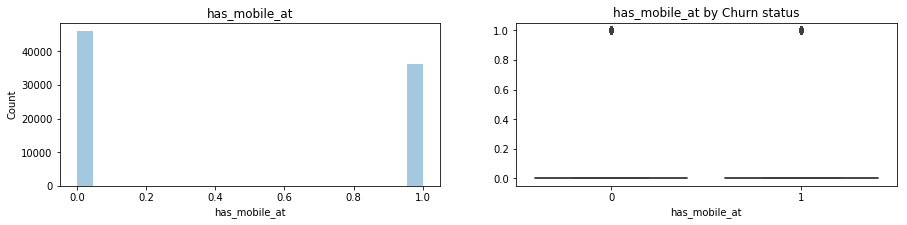

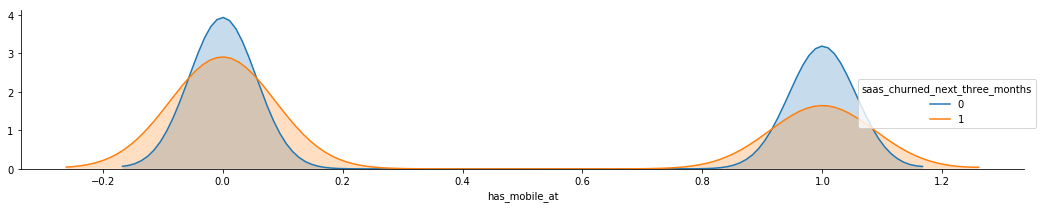

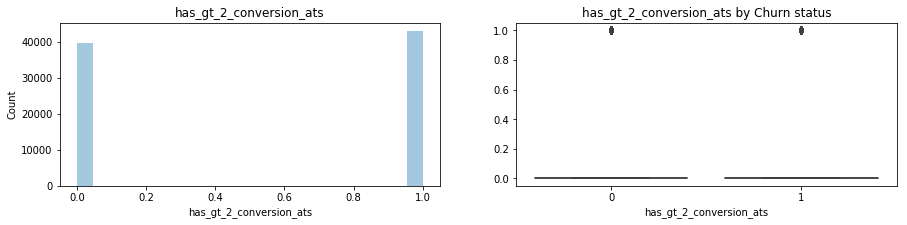

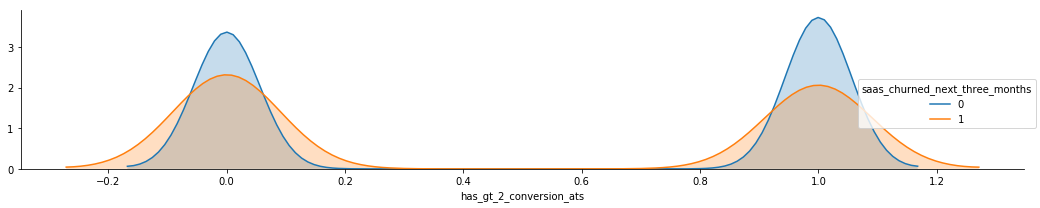

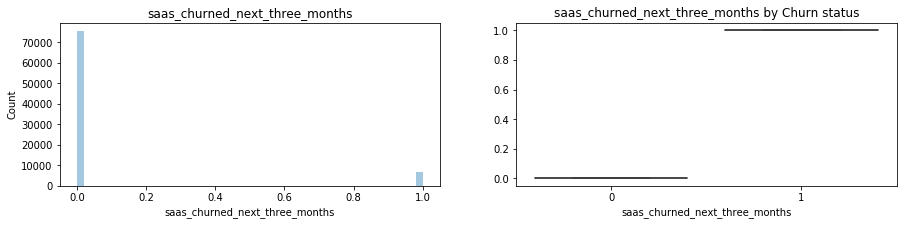

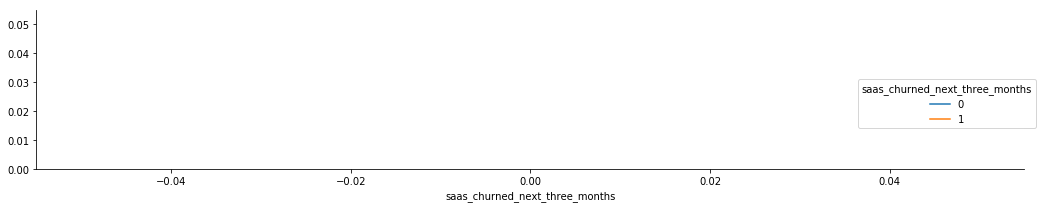

In [34]:

for plot_element in feat_labels:
    plot_var(plot_element, plot_element, continuous=True)

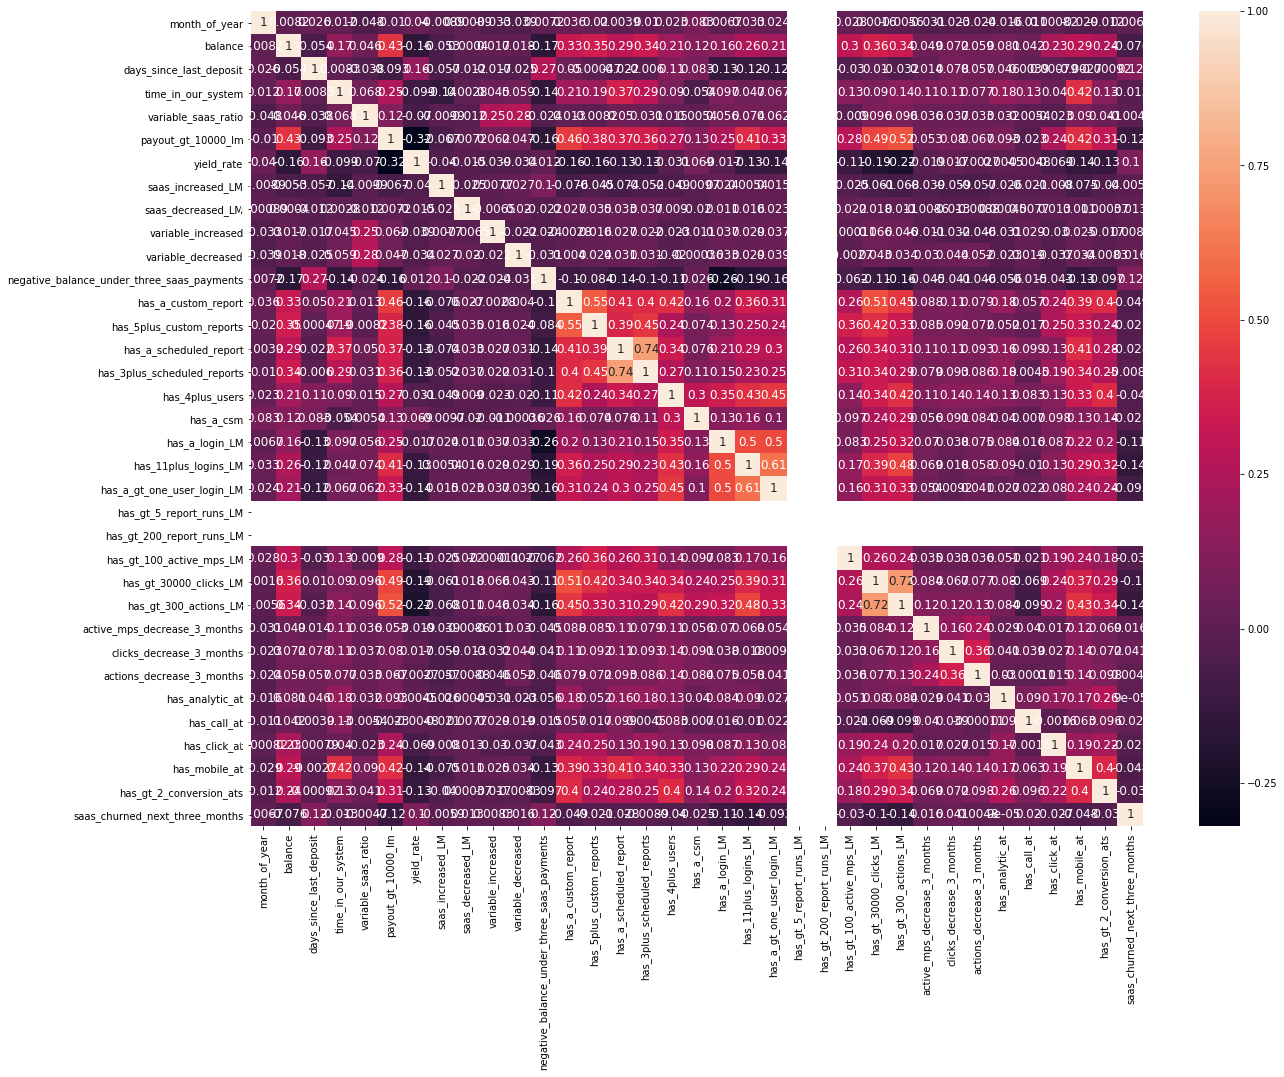

In [35]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [36]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.30)

train_y = train['saas_churned_next_three_months']
test_y = test['saas_churned_next_three_months']
 
train_x = train
train_x.pop('saas_churned_next_three_months')
test_x = test
test_x.pop('saas_churned_next_three_months')

4410     0
6947     0
3412     0
70858    0
70516    0
36206    0
38503    0
45549    0
1671     0
57850    0
71363    0
34621    0
21278    0
6331     0
40545    0
4167     0
7716     0
29655    0
48182    0
51645    0
44745    0
80331    0
10948    0
67405    0
77970    0
51216    0
44912    0
25175    0
13137    0
21220    0
        ..
63260    0
33780    0
67811    0
40054    0
74983    1
7528     0
7927     0
73747    0
11980    0
20700    0
78476    0
512      0
55663    0
50078    0
73748    0
10888    0
31192    0
19493    0
75524    0
42211    0
13076    0
57361    0
13356    0
32991    0
29534    0
5829     0
67656    0
63562    0
52126    0
74079    0
Name: saas_churned_next_three_months, Length: 24781, dtype: int64

In [37]:
#the neural network in Python may have difficulty converging before the maximum number of iterations allowed if the data is not normalized. Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data. Note that you must apply the same scaling to the test set for meaningful results. There are a lot of different methods for normalization of data, we will use the built-in StandardScaler for standardization.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(train_x)
# Now apply the transformations to the data:
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

Intercept: [-2.66776839]
Regression: [[ 2.28129018e-02 -1.58869988e-01  1.17457566e-01 -5.78767134e-02
   3.56508088e-02 -2.68025981e-01  1.60028005e-01 -1.92882958e-02
   5.07869264e-02  1.08211782e-01  1.00025607e-01  1.53604198e-01
   1.47994333e-03  1.84809564e-01 -1.61635821e-03  1.76084784e-01
   3.94410204e-02 -3.22499877e-02 -5.78784515e-02 -2.76582027e-01
   4.99528481e-02  0.00000000e+00  0.00000000e+00  1.65493313e-02
  -3.64056614e-02 -3.27852337e-01  8.83371498e-02  1.47792957e-01
  -4.57519873e-02  1.84211691e-02  3.52102594e-03 -3.08103830e-04
   3.97497477e-02  1.02715017e-01]]
Accuracy of logistic regression classifier on test set: 0.92
             precision    recall  f1-score   support

          0       0.92      1.00      0.96     22740
          1       0.52      0.02      0.03      2041

avg / total       0.89      0.92      0.88     24781



Text(0.5,15,'Predicted label')

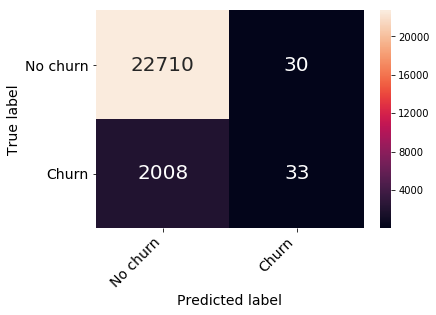

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
 
logisticRegr = LogisticRegression()
logisticRegr.fit(X=train_x, y=train_y)
 
test_y_pred = logisticRegr.predict(test_x)
confusion_matrix = confusion_matrix(test_y, test_y_pred)
print('Intercept: ' + str(logisticRegr.intercept_))
print('Regression: ' + str(logisticRegr.coef_))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr.score(test_x, test_y)))
print(classification_report(test_y, test_y_pred))
 
confusion_matrix_df = pd.DataFrame(confusion_matrix, ('No churn', 'Churn'), ('No churn', 'Churn'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

In [39]:
#How to handle imbalanced classes
data['saas_churned_next_three_months'].value_counts()

0    75749
1     6853
Name: saas_churned_next_three_months, dtype: int64

In [40]:
5795/12603

0.4598111560739506

In [41]:
#How to handle imbalanced classes
from sklearn.utils import resample
 
data_majority = data[data['saas_churned_next_three_months']==0]
data_minority = data[data['saas_churned_next_three_months']==1]
 
data_minority_upsampled = resample(data_minority,
replace=True,
n_samples=12603, #same number of samples as majority classe
random_state=1) #set the seed for random resampling
# Combine resampled results
data_upsampled = pd.concat([data_majority, data_minority_upsampled])
 
data_upsampled['saas_churned_next_three_months'].value_counts()

0    75749
1    12603
Name: saas_churned_next_three_months, dtype: int64

In [110]:
train, test = train_test_split(data_upsampled, test_size = 0.30)
 
train_y_upsampled = train['saas_churned_next_three_months']
test_y_upsampled = test['saas_churned_next_three_months']
 
train_x_upsampled = train
train_x_upsampled.pop('saas_churned_next_three_months')
test_x_upsampled = test
test_x_upsampled.pop('saas_churned_next_three_months')
 
logisticRegr_balanced = LogisticRegression(max_iter=5000)
logisticRegr_balanced.fit(X=train_x_upsampled, y=train_y_upsampled)
 
test_y_pred_balanced = logisticRegr_balanced.predict(test_x_upsampled)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr_balanced.score(test_x_upsampled, test_y_upsampled)))
print(classification_report(test_y_upsampled, test_y_pred_balanced))

Accuracy of logistic regression classifier on test set: 0.86
             precision    recall  f1-score   support

          0       0.86      1.00      0.93     22745
          1       0.66      0.05      0.09      3761

avg / total       0.83      0.86      0.81     26506



In [111]:
from sklearn.ensemble import RandomForestClassifier
bal_randomForest = RandomForestClassifier(n_estimators=100,
                            min_samples_leaf=5,
                            n_jobs=-1,
                            oob_score=True)
randomForest.fit(X=train_x_upsampled, y=train_y_upsampled)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(randomForest.score(test_x_upsampled, test_y_upsampled)))

Accuracy of random forest classifier on test set: 0.99


In [109]:
from sklearn.metrics import roc_auc_score
 
# Get class probabilities for both models
test_y_prob = logisticRegr.predict_proba(test_x)
test_y_prob_balanced = logisticRegr_balanced.predict_proba(test_x_upsampled)
 
# We only need the probabilities for the positive class
test_y_prob = [p[1] for p in test_y_prob]
test_y_prob_balanced = [p[1] for p in test_y_prob_balanced]
 
print('Unbalanced model AUROC: ' + str(roc_auc_score(test_y, test_y_prob)))
print('Balanced model AUROC: ' + str(roc_auc_score(test_y_upsampled, test_y_prob_balanced)))

Unbalanced model AUROC: 0.6999981793635055
Balanced model AUROC: 0.638220310822236


In [114]:
#Decision tree
from sklearn import tree
from sklearn import tree
import graphviz 
 
# Create each decision tree (pruned and unpruned)
decisionTree_unpruned = tree.DecisionTreeClassifier()
decisionTree = tree.DecisionTreeClassifier(max_depth = 10)
 
# Fit each tree to our training data
decisionTree_unpruned = decisionTree_unpruned.fit(X=train_x_upsampled, y=train_y_upsampled)
decisionTree = decisionTree.fit(X=train_x, y=train_y)
 

decisionTree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [115]:
test_y_pred_dt = decisionTree.predict(test_x)
print('Accuracy of Unpruned decision tree classifier on test set: {:.2f}'.format(decisionTree_unpruned.score(test_x_upsampled, test_y_upsampled)))
print('Accuracy of Pruned decision tree classifier on test set: {:.2f}'.format(decisionTree.score(test_x, test_y)))


Accuracy of Unpruned decision tree classifier on test set: 0.99
Accuracy of Pruned decision tree classifier on test set: 0.95


In [119]:
#Now it is time to train our model. SciKit Learn makes this incredibly easy, by using estimator objects. In this case we will import our estimator (the Multi-Layer Perceptron Classifier model) from the neural_network library of SciKit-Learn!
from sklearn.neural_network import MLPClassifier
#Next we create an instance of the model, there are a lot of parameters you can choose to define and customize here, we will only define the hidden_layer_sizes. For this parameter you pass in a tuple consisting of the number of neurons you want at each layer, where the nth entry in the tuple represents the number of neurons in the nth layer of the MLP model. There are many ways to choose these numbers, but for simplicity we will choose 3 layers with the same number of neurons as there are features in our data set along with 500 max iterations.
mlp = MLPClassifier(hidden_layer_sizes=(5,10,5,10,5),max_iter=5000)
#Now that the model has been made we can fit the training data to our model, remember that this data has already been processed and scaled:
mlp.fit(X=train_x, y=train_y)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 10, 5, 10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [120]:
#Predictions and Evaluation
#Now that we have a model it is time to use it to get predictions! We can do this simply with the predict() method off of our fitted model:
predictions = mlp.predict(test_x)

#Now we can use SciKit-Learn’s built in metrics such as a classification report and confusion matrix to evaluate how well our model performed:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(test_y,predictions))
print(classification_report(test_y,predictions))

mlp.score(test_x, test_y)

[[22642    98]
 [ 1801   240]]
             precision    recall  f1-score   support

          0       0.93      1.00      0.96     22740
          1       0.71      0.12      0.20      2041

avg / total       0.91      0.92      0.90     24781



0.9233687098987127

In [123]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier(n_estimators=100,
                            min_samples_leaf=5,
                            n_jobs=-1,
                            oob_score=True)
randomForest.fit(train_x, train_y)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(randomForest.score(test_x, test_y)))


Accuracy of random forest classifier on test set: 0.98


In [49]:

importance = randomForest.feature_importances_

feature_labels = feat_labels
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-:{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

has_gt_5_report_runs_LM-:0.00%
has_gt_200_report_runs_LM-:0.00%
has_gt_100_active_mps_LM-:0.34%
saas_decreased_LM-:0.35%
variable_increased-:0.45%
variable_decreased-:0.46%
has_call_at-:0.53%
saas_increased_LM-:0.88%
active_mps_decrease_3_months-:1.01%
has_5plus_custom_reports-:1.04%
has_a_login_LM-:1.19%
payout_gt_10000_lm-:1.24%
actions_decrease_3_months-:1.31%
has_analytic_at-:1.32%
negative_balance_under_three_saas_payments-:1.35%
has_gt_30000_clicks_LM-:1.41%
has_3plus_scheduled_reports-:1.44%
has_click_at-:1.46%
has_a_gt_one_user_login_LM-:1.49%
has_a_scheduled_report-:1.53%
has_4plus_users-:1.54%
clicks_decrease_3_months-:1.55%
has_a_custom_report-:1.59%
has_mobile_at-:1.70%
has_gt_300_actions_LM-:1.76%
has_a_csm-:1.81%
has_gt_2_conversion_ats-:2.14%
variable_saas_ratio-:2.34%
has_11plus_logins_LM-:2.36%
month_of_year-:9.08%
yield_rate-:10.66%
days_since_last_deposit-:11.12%
balance-:12.81%
time_in_our_system-:20.75%


In [216]:
from sklearn.feature_selection import SelectFromModel

# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(randomForest, threshold=0.005)

# Train the selector
sfm.fit(train_x, train_y)
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(train_x)
X_important_test = sfm.transform(test_x)

In [217]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

month_of_year
balance
days_since_last_deposit
time_in_our_system
variable_saas_ratio
payout_gt_10000_lm
yield_rate
saas_increased_LM
variable_decreased
negative_balance_under_three_saas_payments
has_a_custom_report
has_5plus_custom_reports
has_a_scheduled_report
has_3plus_scheduled_reports
has_4plus_users
has_a_csm
has_a_login_LM
has_11plus_logins_LM
has_a_gt_one_user_login_LM
has_gt_30000_clicks_LM
has_gt_300_actions_LM
active_mps_decrease_3_months
clicks_decrease_3_months
actions_decrease_3_months
has_analytic_at
has_click_at
has_mobile_at
has_gt_2_conversion_ats


In [57]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(train_x)
X_important_test = sfm.transform(test_x)
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train,train_y)

In [50]:
from sklearn.svm import SVC
support_vector_machine = SVC(probability=True)
support_vector_machine.fit(X=train_x, y=train_y)
print('Prediction accuracy on test data with no feature engineering: ',support_vector_machine.score(test_x, test_y))

Prediction accuracy on test data with no feature engineering:  0.940518945966668


In [99]:
#New_Data= pd.read_csv("C:/Users/Desmond Gukwe/Google Drive/Python Scripts/winequality/winequality/d_2.csv"  )
New_Data= pd.read_csv("C:/Users/Desmond Gukwe/Google Drive/Python Scripts/winequality/winequality/aaa.csv"  )
New_Data=New_Data.drop(['id','year','yellow_flag', 'red_flag', 'retrospectively_churned_next_three_months','retrospective_SAAS_current_month', 'retrospective_SAAS_next_month', 'retrospective_SAAS_2_after', 'retrospective_SAAS_3_after','retrospective_SAAS_current_month','saas_churned_next_three_months', 'doe'],axis =1)



New_Data.head()

,month_of_year,account_id,balance,days_since_last_deposit,time_in_our_system,variable_saas_ratio,payout_gt_10000_lm,yield_rate,saas_increased_LM,saas_decreased_LM,...,has_gt_30000_clicks_LM,has_gt_300_actions_LM,active_mps_decrease_3_months,clicks_decrease_3_months,actions_decrease_3_months,has_analytic_at,has_call_at,has_click_at,has_mobile_at,has_gt_2_conversion_ats
0,4,10063,0.00,0,3120,0.0,0,5.0000,0,1,...,0,0,0,0,0,0,0,0,1,0
1,4,10424,5760.00,29,2894,0.0,1,0.1014,0,0,...,0,0,0,0,0,1,0,0,1,1
2,4,11219,16111.04,16,2705,0.0,1,0.0864,0,0,...,0,0,0,0,0,0,0,0,1,1
3,4,11223,0.00,0,2705,2.4,1,0.0279,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,12346,78.16,37,2609,0.0,0,0.1933,0,0,...,0,0,0,0,0,0,1,0,0,0


In [121]:
data_to_predict=New_Data.drop(['account_id'],axis =1)
pred_cols = list(data_to_predict.columns.values)[:-1]
data_to_predict.head()

,month_of_year,balance,days_since_last_deposit,time_in_our_system,variable_saas_ratio,payout_gt_10000_lm,yield_rate,saas_increased_LM,saas_decreased_LM,variable_increased,...,has_gt_30000_clicks_LM,has_gt_300_actions_LM,active_mps_decrease_3_months,clicks_decrease_3_months,actions_decrease_3_months,has_analytic_at,has_call_at,has_click_at,has_mobile_at,has_gt_2_conversion_ats
0,4,0.00,0,3120,0.0,0,5.0000,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,4,5760.00,29,2894,0.0,1,0.1014,0,0,0,...,0,0,0,0,0,1,0,0,1,1
2,4,16111.04,16,2705,0.0,1,0.0864,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,4,0.00,0,2705,2.4,1,0.0279,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,78.16,37,2609,0.0,0,0.1933,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [122]:
data_to_predict['balance'] = data_to_predict.balance.astype(float)

dt_probs=decisionTree_unpruned.predict_proba(data_to_predict)
dt_probs_2=decisionTree.predict_proba(data_to_predict)

lg_bal_probs=logisticRegr_balanced.predict_proba(data_to_predict)
lg_probs=logisticRegr.predict_proba(data_to_predict)

svm_probs=support_vector_machine.predict_proba(data_to_predict)
rf_probs=bal_randomForest.predict_proba(data_to_predict)




NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [ ]:
dt_unprened=pd.DataFrame(np.array(decisionTree_unpruned.predict(data_to_predict)), columns = ['dt_Uprnd_predictions_Results'])
dt_pruned =pd.DataFrame(np.array(knn.predict(data_to_predict)), columns = ['dt_pruned_Predicted_Results'])
Dt_Predictions=np.append(dt_unprened,dt_pruned,axis=1)
Dt_Probability_Predictions=np.append(dt_probs,dt_probs_2,axis=1)
results_dt =pd.DataFrame(np.array(Probability_Predictions), columns = ['unprenud_dt','b','unprenud_dt','d'])
results_dt_2 =pd.DataFrame(np.array(_Predictions), columns = ['dt_unprened','dt_pruned'])


lg_bal_preds=pd.DataFrame(np.array(logisticRegr_balanced.predict(data_to_predict)), columns = ['logisticRegr_balanced'])
lg_preds =pd.DataFrame(np.array(logisticRegr.predict(data_to_predict)), columns = ['logisticRegr'])
LG_Predictions=np.append(lg_bal_preds,lg_preds,axis=1)
LG_Probability_Predictions=np.append(lg_bal_probs,lg_probs,axis=1)
results_lg =pd.DataFrame(np.array(LG_Probability_Predictions), columns = ['bal_lg','b','lg','d'])
results_lg_2 =pd.DataFrame(np.array(_Predictions), columns = ['lg_bal_preds','lg_preds'])


svm_preds=pd.DataFrame(np.array(support_vector_machine.predict(data_to_predict)), columns = ['support_vector_machine'])
rf_preds =pd.DataFrame(np.array(bal_randomForest.predict(data_to_predict)), columns = ['randomForest'])
svm_rf_predictions=np.append(svm_preds,rf_preds,axis=1)
svm_rf_Probability_Predictions=np.append(svm_probs,rf_probs,axis=1)
results_svm_rf =pd.DataFrame(np.array(svm_rf_Probability_Predictions), columns = ['svm','b','rf','d'])
results_svm_rf2 =pd.DataFrame(np.array(svm_rf_predictions), columns = ['svm_preds','rf_predictions'])


In [113]:
Out=New_Data.loc[:, ['account_id', 'balance','yield_rate','days_since_last_deposit']]
R=pd.concat([Out,results_svm_rf,results_svm_rf2,results_lg,results_lg_2,results_dt,results_dt_2], axis =1)
R.to_csv('C:/Users/Desmond Gukwe/Google Drive/Python Scripts/winequality/winequality/out.csv')

In [2]:
!pip3 install GML


  Using cached https://files.pythonhosted.org/packages/b0/91/3580e3e1f4151fed64cf37840bae994ea7d1409a58a527b8fd010c31c909/GML-2.0.4-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/1b/c3/125f1acf2b9c0d8bbb8807478621a7543a7d059668e55c78f9c2d21f62cc/autofeat-1.1.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/05/be/8fe733126feaccae1f478019ae28928cf383f47e16dafd23da4b64a5c884/catboost-0.22-cp37-none-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/36/a5/703d93321f57048596217789be7c186304a33aff5b1c48c89597a546c65e/xgboost-1.0.2.tar.gz
    ERROR: Command errored out with exit status 1:
     command: /usr/local/opt/python/bin/python3.7 -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/64/sc2zgn610_g3j0rk9q9gcqm4rl5hbx/T/pip-install-pfv8f9uj/xgboost/setup.py'"'"'; __file__='"'"'/private/var/folders/64/sc2zgn610_g3j

In [1]:
from GML.Ghalat_Machine_Learning import Ghalat_Machine_Learning
gml = Ghalat_Machine_Learning()

ModuleNotFoundError: No module named 'GML'